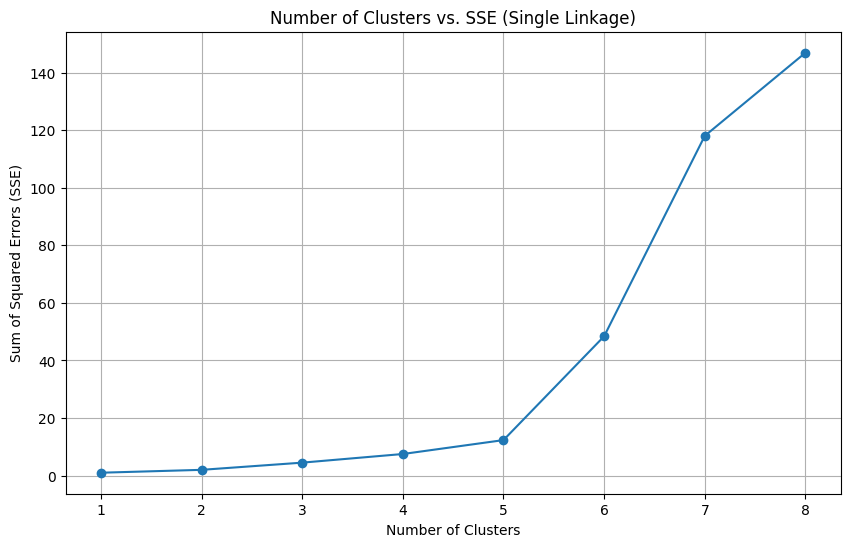

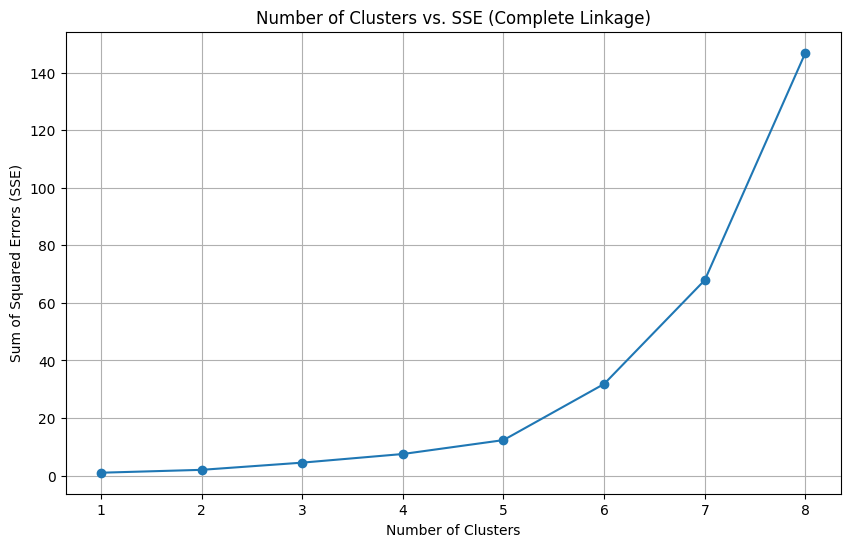

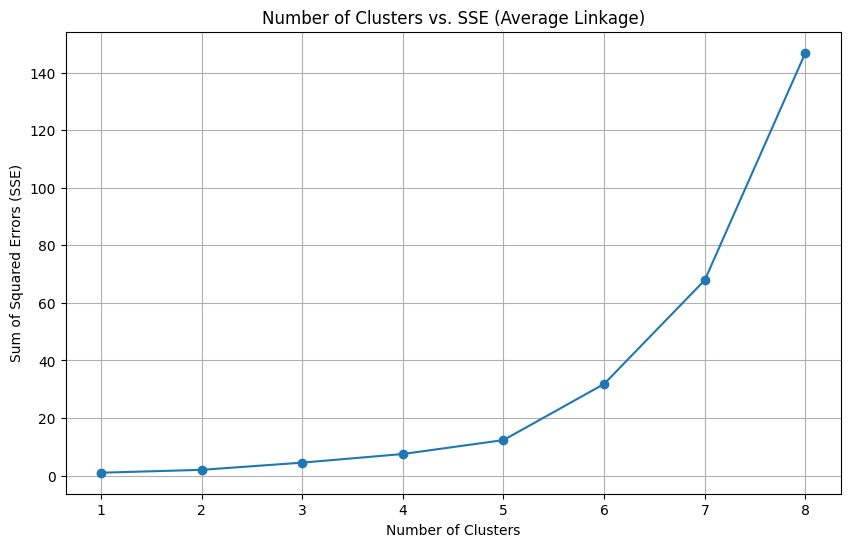

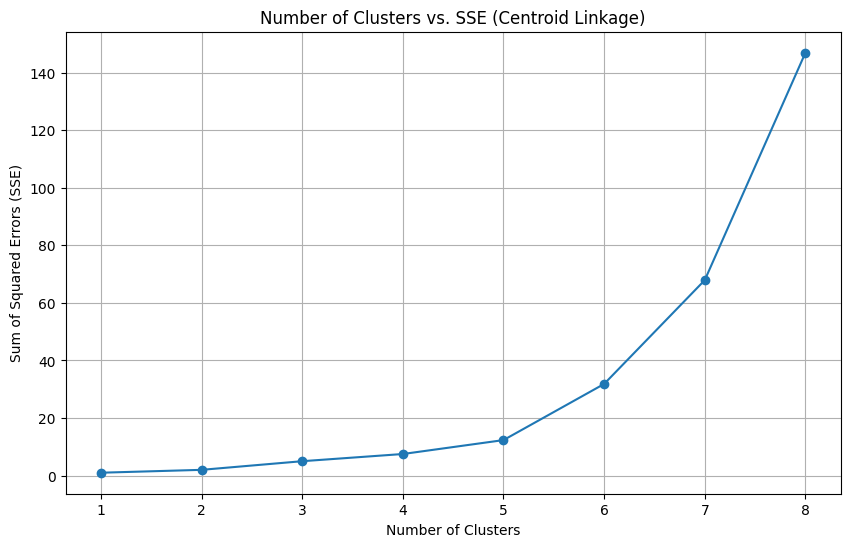

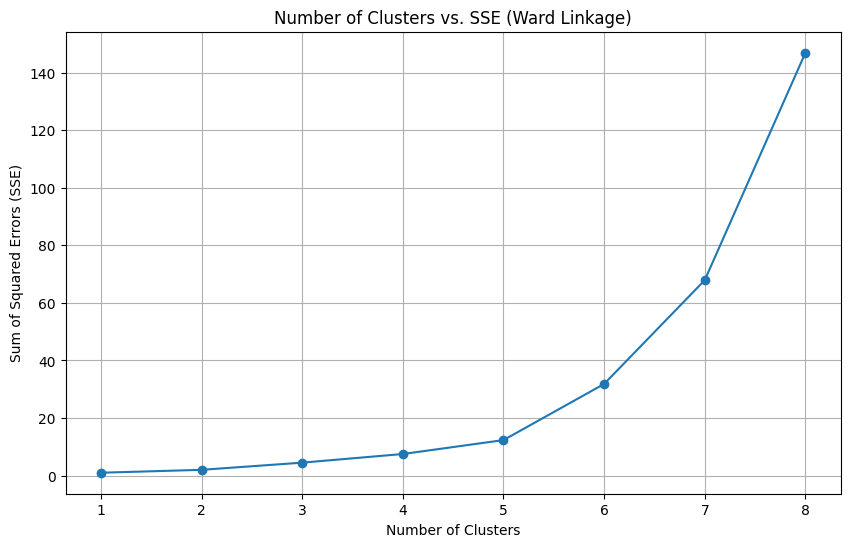

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Given data points
data = np.array([
    [1, 1],
    [3, 2],
    [9, 1],
    [3, 7],
    [7, 2],
    [9, 7],
    [4,8],
    [8, 3],
    [1, 4]
])

# Function to calculate Euclidean distance
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

# Function to calculate Sum of Squared Errors (SSE) for given clusters and centroids
def calculate_sse(data, clusters, centroids):
    sse = 0
    for i, cluster in enumerate(clusters):
        for point_index in cluster:
            sse += euclidean_distance(data[point_index], centroids[i]) ** 2
    return sse

# Function to perform hierarchical clustering and calculate SSE
def hierarchical_clustering_with_sse(data, linkage_method):
    clusters = [[i] for i in range(len(data))]
    sse_values = []

    # Function to calculate linkage distance between clusters
    def linkage_distance(cluster1, cluster2, method):
        if method == "single":
            return min(euclidean_distance(data[i], data[j]) for i in cluster1 for j in cluster2)
        elif method == "complete":
            return max(euclidean_distance(data[i], data[j]) for i in cluster1 for j in cluster2)
        elif method == "average":
            return np.mean([euclidean_distance(data[i], data[j]) for i in cluster1 for j in cluster2])
        elif method == "centroid":
            centroid1 = np.mean([data[i] for i in cluster1], axis=0)
            centroid2 = np.mean([data[j] for j in cluster2], axis=0)
            return euclidean_distance(centroid1, centroid2)
        elif method == "ward":
            # Ward's method: Calculate the increase in SSE if the clusters are merged
            centroid1 = np.mean([data[i] for i in cluster1], axis=0)
            centroid2 = np.mean([data[j] for j in cluster2], axis=0)
            combined_centroid = np.mean([data[i] for i in cluster1 + cluster2], axis=0)
            sse_before = sum(euclidean_distance(data[i], centroid1) ** 2 for i in cluster1) + \
                         sum(euclidean_distance(data[j], centroid2) ** 2 for j in cluster2)
            sse_after = sum(euclidean_distance(data[i], combined_centroid) ** 2 for i in cluster1 + cluster2)
            return sse_after - sse_before

    # Agglomerative hierarchical clustering
    while len(clusters) > 1:
        min_distance = float("inf")
        to_merge = (0, 0)

        # Find the two clusters with the smallest distance
        for i in range(len(clusters)):
            for j in range(i + 1, len(clusters)):
                distance = linkage_distance(clusters[i], clusters[j], linkage_method)
                if distance < min_distance:
                    min_distance = distance
                    to_merge = (i, j)

        # Merge the two closest clusters
        clusters[to_merge[0]].extend(clusters[to_merge[1]])
        del clusters[to_merge[1]]

        # Calculate the new centroids for the remaining clusters
        centroids = [np.mean([data[idx] for idx in cluster], axis=0) for cluster in clusters]

        # Calculate SSE for the current clustering
        sse = calculate_sse(data, clusters, centroids)
        sse_values.append(sse)

    return sse_values

# Perform hierarchical clustering and plot SSE for each linkage method
linkage_methods = ["single", "complete", "average", "centroid", "ward"]
for method in linkage_methods:
    sse_values = hierarchical_clustering_with_sse(data, method)
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(sse_values) + 1), sse_values, marker='o')
    plt.xlabel("Number of Clusters")
    plt.ylabel("Sum of Squared Errors (SSE)")
    plt.title(f"Number of Clusters vs. SSE ({method.capitalize()} Linkage)")
    plt.grid(True)
    plt.show()


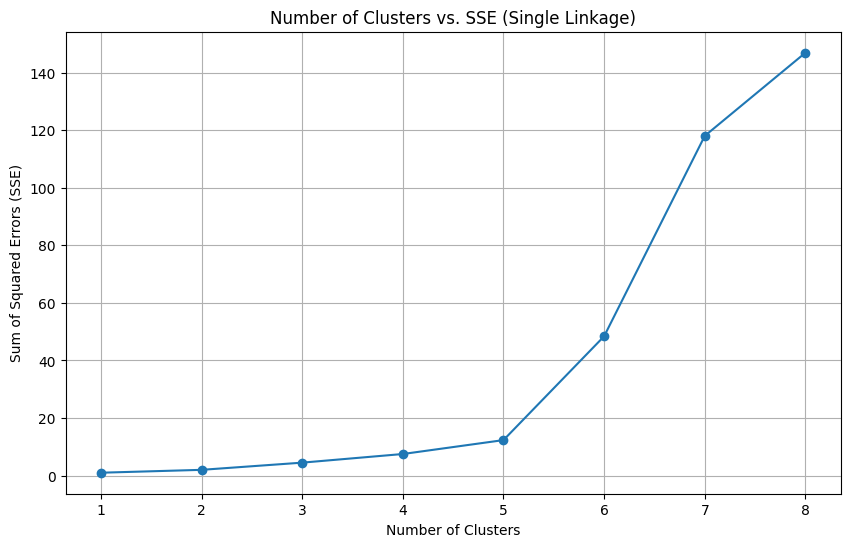

Proximity Matrix (Euclidean Distance):
 [[ 0.    2.24  8.    6.32  6.08 10.    7.62  7.28  3.  ]
 [ 2.24  0.    6.08  5.    4.    7.81  6.08  5.1   2.83]
 [ 8.    6.08  0.    8.49  2.24  6.    8.6   2.24  8.54]
 [ 6.32  5.    8.49  0.    6.4   6.    1.41  6.4   3.61]
 [ 6.08  4.    2.24  6.4   0.    5.39  6.71  1.41  6.32]
 [10.    7.81  6.    6.    5.39  0.    5.1   4.12  8.54]
 [ 7.62  6.08  8.6   1.41  6.71  5.1   0.    6.4   5.  ]
 [ 7.28  5.1   2.24  6.4   1.41  4.12  6.4   0.    7.07]
 [ 3.    2.83  8.54  3.61  6.32  8.54  5.    7.07  0.  ]]

Proximity Matrix (Manhattan Distance):
 [[ 0.  3.  8.  8.  7. 14. 10.  9.  3.]
 [ 3.  0.  7.  5.  4. 11.  7.  6.  4.]
 [ 8.  7.  0. 12.  3.  6. 12.  3. 11.]
 [ 8.  5. 12.  0.  9.  6.  2.  9.  5.]
 [ 7.  4.  3.  9.  0.  7.  9.  2.  8.]
 [14. 11.  6.  6.  7.  0.  6.  5. 11.]
 [10.  7. 12.  2.  9.  6.  0.  9.  7.]
 [ 9.  6.  3.  9.  2.  5.  9.  0.  8.]
 [ 3.  4. 11.  5.  8. 11.  7.  8.  0.]]

Proximity Matrix (Minkowski Distance, p=3):
 [[0.   

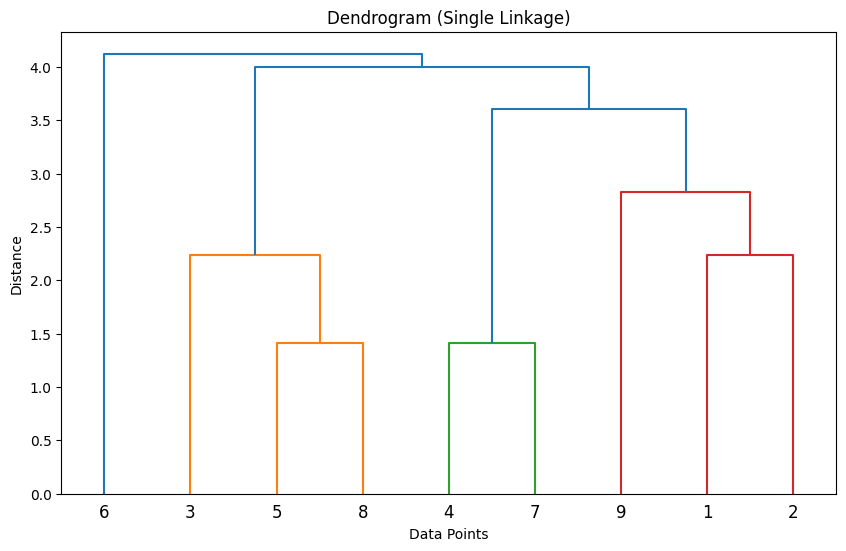

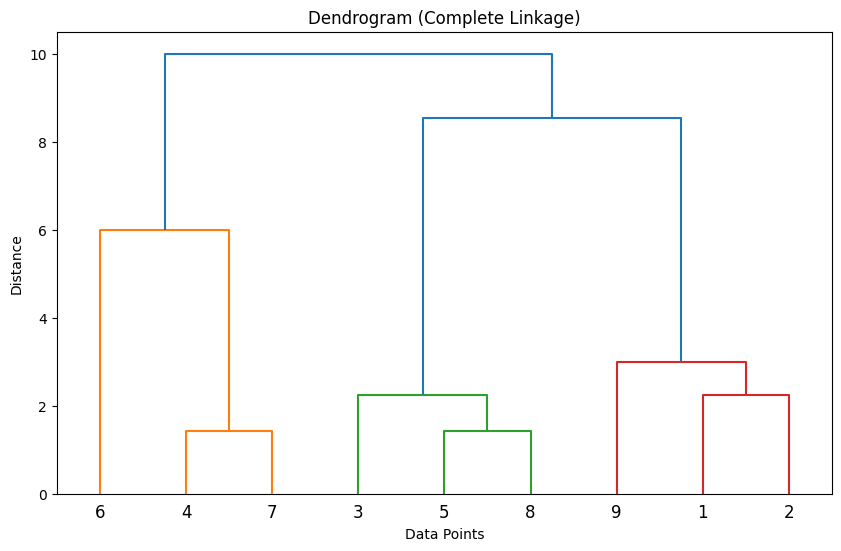

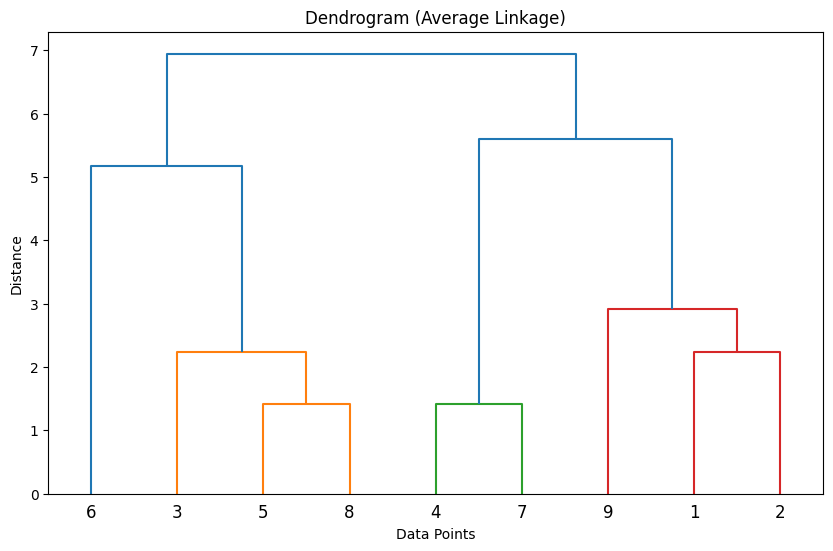

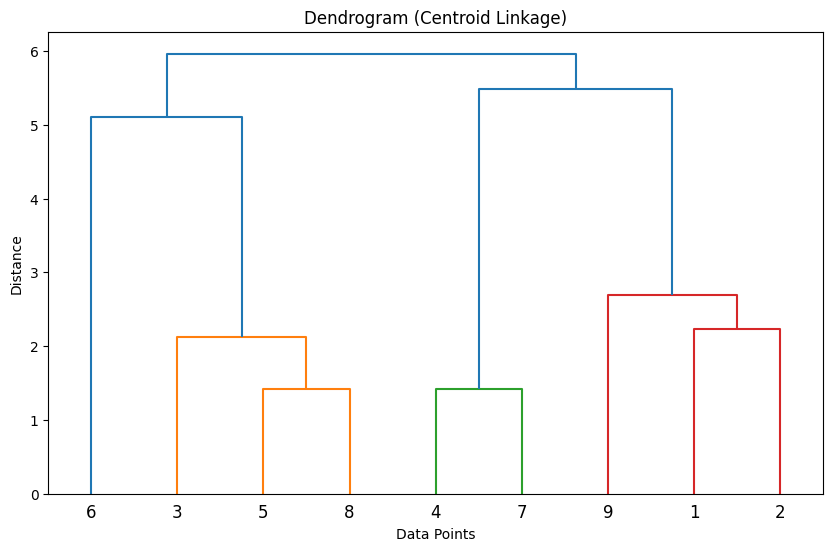

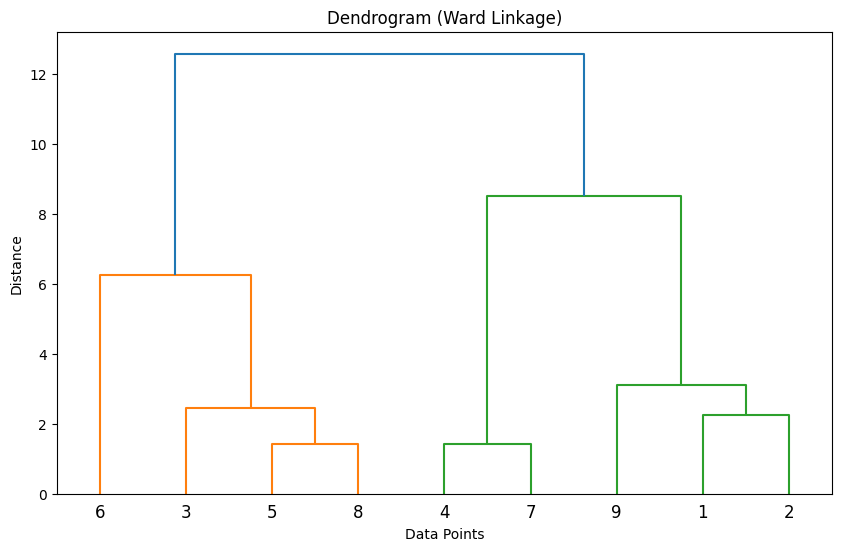

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram

# Given data points
data = np.array([
    [1, 1],
    [3, 2],
    [9, 1],
    [3, 7],
    [7, 2],
    [9, 7],
    [4,8],
    [8, 3],
    [1, 4]
])


# Function to calculate Euclidean distance
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

# Function to calculate Manhattan distance
def manhattan_distance(a, b):
    return np.sum(np.abs(a - b))

# Function to calculate Minkowski distance (p=3)
def minkowski_distance(a, b, p=3):
    return np.sum(np.abs(a - b) ** p) ** (1 / p)

# Function to calculate proximity matrix using a given distance metric
def calculate_proximity_matrix(data, distance_metric):
    n = len(data)
    proximity_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            proximity_matrix[i, j] = distance_metric(data[i], data[j])
    return proximity_matrix

# a. Plotting SSE values for hierarchical clustering
def calculate_sse(data, clusters, centroids):
    sse = 0
    for i, cluster in enumerate(clusters):
        for point_index in cluster:
            sse += euclidean_distance(data[point_index], centroids[i]) ** 2
    return sse

def hierarchical_clustering_with_sse(data):
    clusters = [[i] for i in range(len(data))]
    sse_values = []

    while len(clusters) > 1:
        min_distance = float("inf")
        to_merge = (0, 0)

        for i in range(len(clusters)):
            for j in range(i + 1, len(clusters)):
                distance = min(euclidean_distance(data[x], data[y]) for x in clusters[i] for y in clusters[j])
                if distance < min_distance:
                    min_distance = distance
                    to_merge = (i, j)

        clusters[to_merge[0]].extend(clusters[to_merge[1]])
        del clusters[to_merge[1]]
        centroids = [np.mean([data[idx] for idx in cluster], axis=0) for cluster in clusters]
        sse = calculate_sse(data, clusters, centroids)
        sse_values.append(sse)

    return sse_values

sse_values = hierarchical_clustering_with_sse(data)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(sse_values) + 1), sse_values, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Sum of Squared Errors (SSE)")
plt.title("Number of Clusters vs. SSE (Single Linkage)")
plt.grid(True)
plt.show()

# b. Display proximity matrices
print("Proximity Matrix (Euclidean Distance):\n", np.round(calculate_proximity_matrix(data, euclidean_distance), 2))
print("\nProximity Matrix (Manhattan Distance):\n", np.round(calculate_proximity_matrix(data, manhattan_distance), 2))
print("\nProximity Matrix (Minkowski Distance, p=3):\n", np.round(calculate_proximity_matrix(data, lambda a, b: minkowski_distance(a, b, p=3)), 2))

# c. Plotting dendrograms for different linkage methods
from scipy.cluster.hierarchy import linkage

linkage_methods = ["single", "complete", "average", "centroid", "ward"]
for method in linkage_methods:
    linked = linkage(data, method=method if method != "centroid" else "centroid")
    plt.figure(figsize=(10, 6))
    dendrogram(linked, labels=range(1, len(data) + 1))
    plt.title(f"Dendrogram ({method.capitalize()} Linkage)")
    plt.xlabel("Data Points")
    plt.ylabel("Distance")
    plt.show()


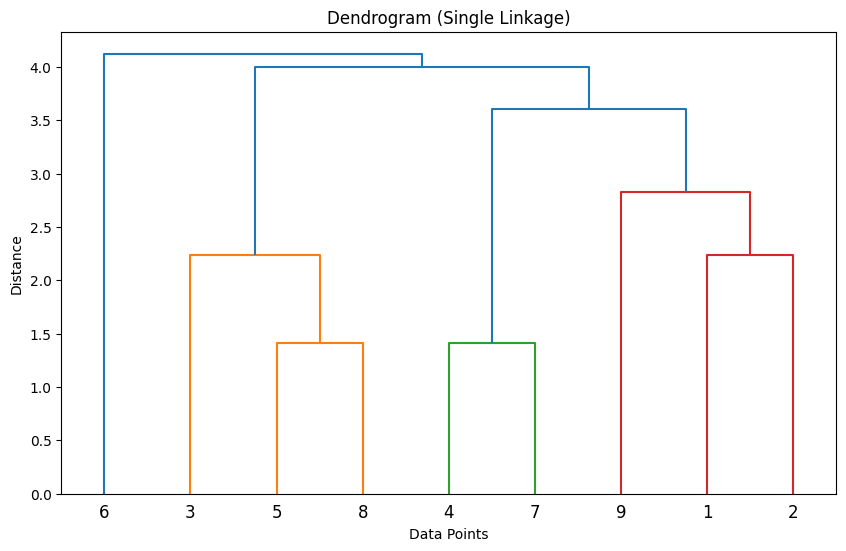

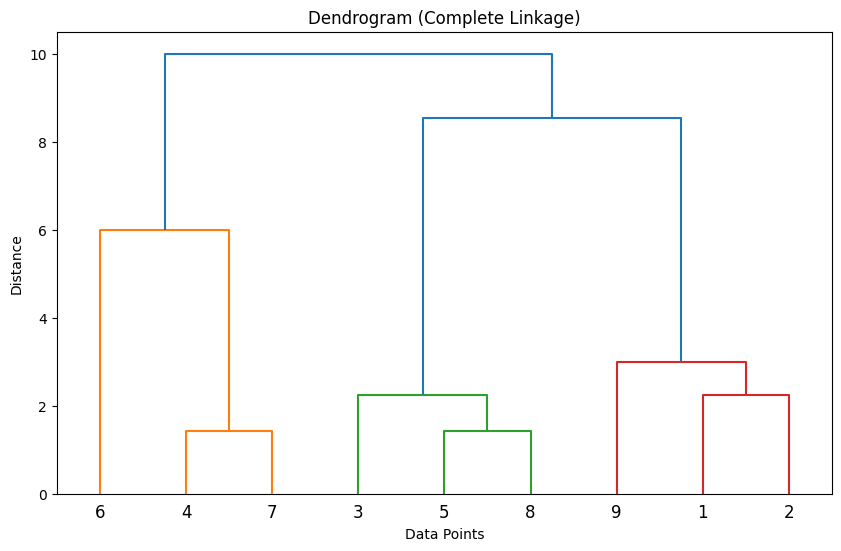

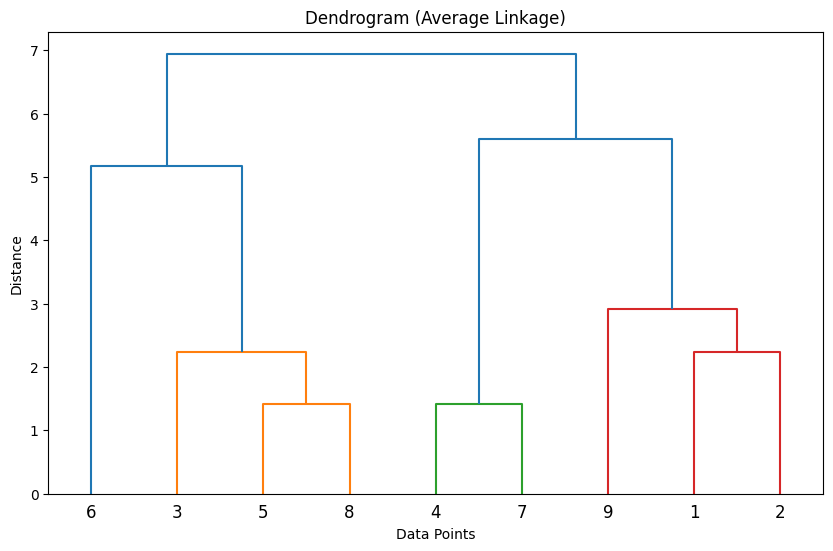

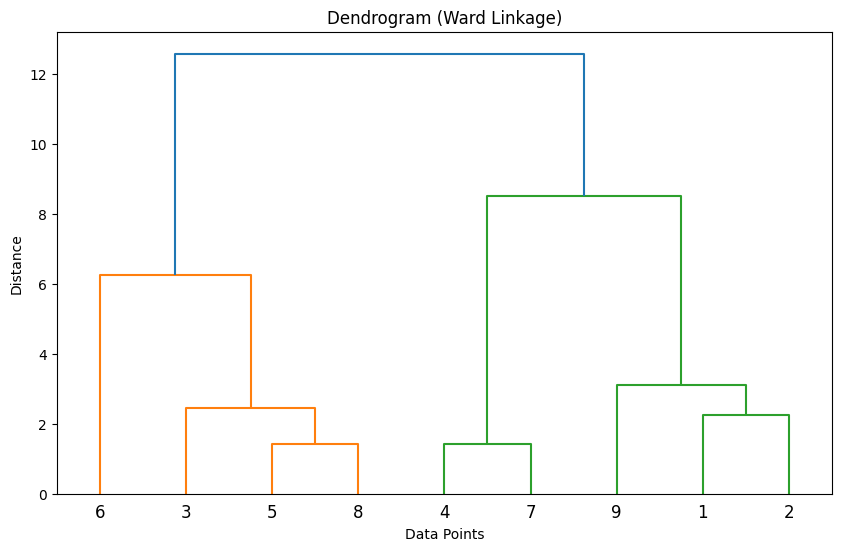

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Given data points
data = np.array([
    [1, 1],
    [3, 2],
    [9, 1],
    [3, 7],
    [7, 2],
    [9, 7],
    [4,8],
    [8, 3],
    [1, 4]
])


# a. Using AgglomerativeClustering from scikit-learn to perform clustering
linkage_methods = ["single", "complete", "average", "ward"]

for method in linkage_methods:
    # Create and fit the model
    model = AgglomerativeClustering(n_clusters=None, distance_threshold=0, linkage=method)
    model.fit(data)
    
    # Use scipy's linkage for dendrogram plotting
    linked = linkage(data, method=method)
    
    # Plotting the dendrogram
    plt.figure(figsize=(10, 6))
    dendrogram(linked, labels=range(1, len(data) + 1))
    plt.title(f"Dendrogram ({method.capitalize()} Linkage)")
    plt.xlabel("Data Points")
    plt.ylabel("Distance")
    plt.show()
